In [88]:
from dydx3 import Client
from dydx3.constants import SYNTHETIC_ASSET_MAP

def get_all_dydx_markets():
    return list(SYNTHETIC_ASSET_MAP.keys())

ALL_MARKETS = get_all_dydx_markets()

c = Client("https://api.dydx.exchange")
# c.public.get_markets().data
candles = c.public.get_candles(
  market=ALL_MARKETS[1],
  resolution='1DAY',
).data

def get_daily_candles(client, mkt):
    return client.public.get_candles(
      market=mkt,
      resolution='1DAY',
    ).data
    

mkt_candles = {mkt: get_daily_candles(c, mkt)["candles"] for mkt in ALL_MARKETS[:10]}

In [89]:
from collections import defaultdict
import pandas as pd

volumes = defaultdict(float)
for mkt in mkt_candles.keys():
    sub_mkt_candles = mkt_candles[mkt]
    for candle in sub_mkt_candles:
        start_timestamp = candle["startedAt"]
        usd_volume = candle["usdVolume"]
        volumes[start_timestamp] += float(usd_volume)
        
volumes = pd.Series(volumes).iloc[::-1]
volumes

2021-12-07T00:00:00.000Z    7.874376e+08
2021-12-08T00:00:00.000Z    1.045914e+09
2021-12-09T00:00:00.000Z    1.569311e+09
2021-12-10T00:00:00.000Z    1.867523e+09
2021-12-11T00:00:00.000Z    1.301698e+09
                                ...     
2022-03-12T00:00:00.000Z    1.827824e+09
2022-03-13T00:00:00.000Z    3.313152e+09
2022-03-14T00:00:00.000Z    5.947511e+09
2022-03-15T00:00:00.000Z    7.040264e+09
2022-03-16T00:00:00.000Z    5.539539e+08
Length: 100, dtype: float64

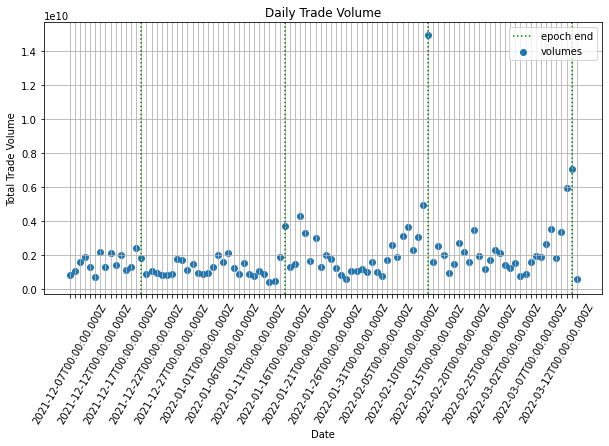

In [90]:
import matplotlib.pyplot as plt

# get data
plot_set = volumes

# plot it
_, (ax) = plt.subplots(1, figsize=(10,5))

volumes_plot = ax.scatter(plot_set.index, plot_set.values)

plt.title("Daily Trade Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Total Trade Volume")

epoch_end_dates = ["2021-12-21T00:00:00.000Z", "2022-01-18T00:00:00.000Z", "2022-02-15T00:00:00.000Z", "2022-03-15T00:00:00.000Z"]
for epoch_end in epoch_end_dates:
    epoch_end_line = ax.axvline(x=epoch_end, color='g', linestyle=':')

xticks = ax.xaxis.get_major_ticks()
for i, xtick in enumerate(xticks):
    if i % 5 != 0:
        xtick.label1.set_visible(False)

plt.xticks(rotation=60)
plt.grid()
ax.legend([epoch_end_line, volumes_plot], ['epoch end', 'volumes'], loc='upper right');



Trader volume appears to increase just before the end of each epoch, as anticipated.